In [102]:

from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display

%matplotlib inline               

pykat.init_pykat_plotting(dpi=200)

In [103]:
basecode = """

#input laser
l L0 1 0 n0

#HG modes
tem L0 0 0 1 0
tem L0 1 0 1 0
tem L0 2 0 1 0
tem L0 3 0 1 0
tem L0 4 0 1 0
tem L0 5 0 1 0
tem L0 6 0 1 0
tem L0 7 0 1 0
tem L0 8 0 1 0
tem L0 9 0 1 0
tem L0 10 0 1 0
const l 10


#cavity
s s0 0 n0 nITM1
m1 ITM 0.014 0 0 nITM1 nITM2
s scav $l nITM2 nETM1
m1 ETM 0 0 0 nETM1 nETM2

#mirror Roc
attr ITM Rc 0
attr ETM Rcx 10
attr ETM Rcy 10

cav FP ITM nITM2 ETM nETM1



#plot g vs order
xaxis ETM Rcx lin 10 30 8000
func g = 1-($l/$x1)
put ETM Rcy $x1

#ad detectors
ad order0 0 0 0 nETM1
ad order1 1 0 0 nETM1
ad order2 2 0 0 nETM1
ad order3 3 0 0 nETM1
ad order4 4 0 0 nETM1
ad order5 5 0 0 nETM1
ad order6 6 0 0 nETM1
ad order7 7 0 0 nETM1
ad order8 8 0 0 nETM1
ad order9 9 0 0 nETM1
ad order10 10 0 0 nETM1


maxtem 10
phase 2

#noplot Rc2

"""

Parsing `tem L0 0 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 1 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 2 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 3 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 4 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 5 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 6 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 7 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 8 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 9 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 10 0 1 0` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
R

Text(0, 0.5, 'HG modes intensity')

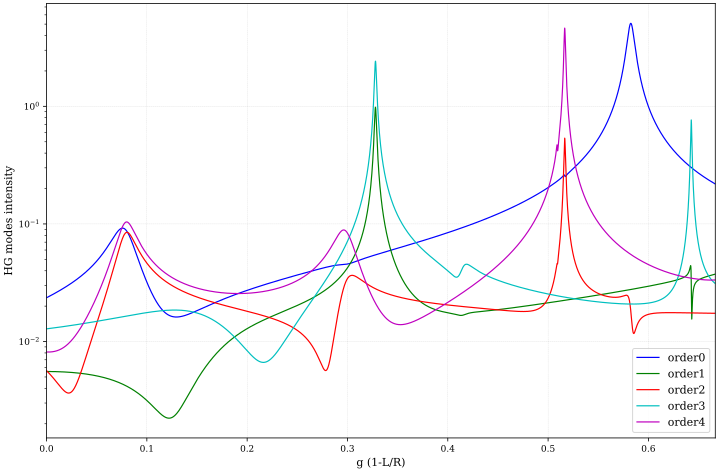

In [104]:
basekat = finesse.kat() 
basekat.verbose = 1
basekat.parse(basecode)

out = basekat.run()
out.info()
y=[]
x= out['g']
colors = ['b','g','r','c','m','y','k','w']
plt.figure(figsize=(12,8))
for i in range(5):
    y.append(out['order'+str(i)])
    plt.semilogy(x,y[i],antialiased=False,label='order'+str(i),c=colors[i])

plt.legend(["order0", "order1","order2","order3","order4","order5","order6","order7","order8","order9","order10"], loc ="lower right")
plt.xlabel("g (1-L/R)")
plt.ylabel("HG modes intensity")